In [84]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
from scipy.linalg import eigh
import seaborn as sns
from sklearn import decomposition

In [41]:
data=pd.read_csv('C:/Users/Sanky27/Downloads/mnist_train.csv')

In [42]:
print(data.head(5))

   label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0      1       0       0       0       0       0       0       0       0   
1      0       0       0       0       0       0       0       0       0   
2      1       0       0       0       0       0       0       0       0   
3      4       0       0       0       0       0       0       0       0   
4      0       0       0       0       0       0       0       0       0   

   pixel8  ...  pixel774  pixel775  pixel776  pixel777  pixel778  pixel779  \
0       0  ...         0         0         0         0         0         0   
1       0  ...         0         0         0         0         0         0   
2       0  ...         0         0         0         0         0         0   
3       0  ...         0         0         0         0         0         0   
4       0  ...         0         0         0         0         0         0   

   pixel780  pixel781  pixel782  pixel783  
0         0         0         

In [43]:
l=data['label']

In [44]:
new_data=data.drop('label',axis=1)

In [45]:
print(new_data.shape)
print(l.shape)

(42000, 784)
(42000,)


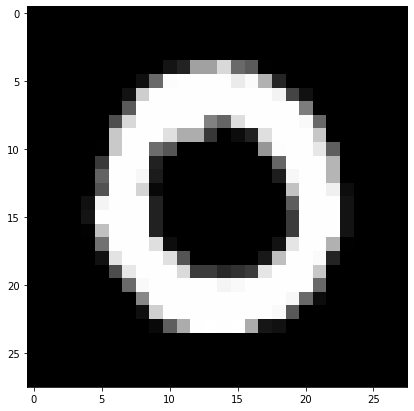

0


In [46]:
plt.figure(figsize=(7,7))
idx = 1
grid_data=new_data.iloc[idx].values.reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap='Greys_r')
plt.show()
print(l[idx])

In [47]:
labels=l.head(42000)
d=new_data.head(42000)
print('shape of data=',d.shape)

shape of data= (42000, 784)


In [49]:
standardised_data=StandardScaler().fit_transform(d)
print(standardised_data.shape)

(42000, 784)


In [52]:
sample_data=standardised_data
covar_matrix=np.matmul(sample_data.T,sample_data)
print('the shapoe of variance of matrix is=',covar_matrix.shape)

the shapoe of variance of matrix is= (784, 784)


In [57]:
values,vector=eigh(covar_matrix,eigvals=(782,783))
print('the shape of eigen vector=',vector.shape)
vectors=vector.T
print('updated shape of eigen vector',vectors.shape)

the shape of eigen vector= (784, 2)
updated shape of eigen vector (2, 784)


In [79]:
new_coordinates=np.matmul(vectors,sample_data.T)
print('resultanat new data point shape ',vectors.shape,'X',sample_data.T.shape,'=',new_coordinates.shape)

resultanat new data point shape  (2, 784) X (784, 42000) = (2, 42000)


In [80]:
new_coordinates=np.vstack((new_coordinates,labels)).T
dataframe=pd.DataFrame(data=new_coordinates,columns=('1st_principal','2nd_principal','label'))
print(dataframe.head())

   1st_principal  2nd_principal  label
0      -5.226445      -5.140478    1.0
1       6.032996      19.292332    0.0
2      -1.705813      -7.644503    1.0
3       5.836139      -0.474207    4.0
4       6.024818      26.559574    0.0


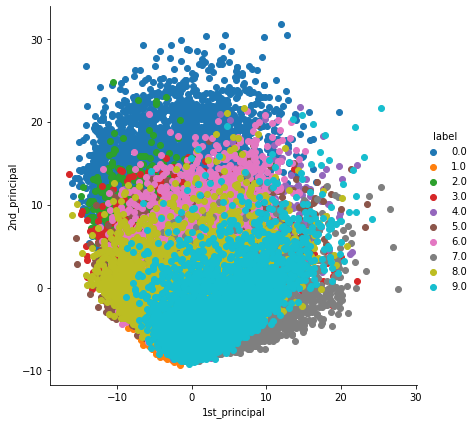

In [81]:
sns.FacetGrid(dataframe,hue='label',size=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()

In [82]:
# PCA using scikit-learn



In [87]:
pca=decomposition.PCA()

In [97]:
pca.n_components=2
pca_data=pca.fit_transform(sample_data)
print('shape of pca_reduced.shape=',pca_data.shape)

shape of pca_reduced.shape= (42000, 2)


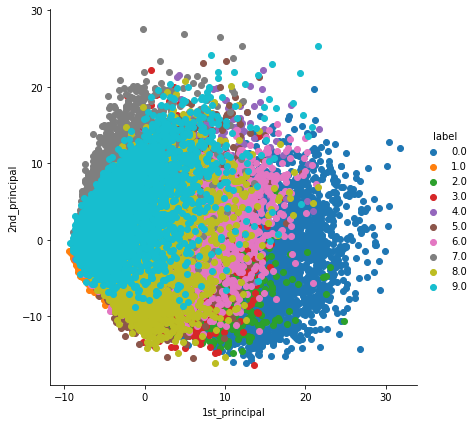

In [98]:
pca_data=np.vstack((pca_data.T,labels)).T
pca_df=pd.DataFrame(data=pca_data,columns=('1st_principal','2nd_principal','label'))
sns.FacetGrid(pca_df,hue='label',height=6).map(plt.scatter,'1st_principal','2nd_principal').add_legend()
plt.show()